<a href="https://colab.research.google.com/github/Jerpac/NeuralNetwork/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


____________________________________________TRIAL #1 is currently loading...____________________________________________
4/4 [==============================] - 0s 14ms/step

____________________________________________TRIAL #2 is currently loading...____________________________________________
4/4 [==============================] - 0s 5ms/step

____________________________________________TRIAL #3 is currently loading...____________________________________________
4/4 [==============================] - 0s 4ms/step

____________________________________________TRIAL #4 is currently loading...____________________________________________
4/4 [==============================] - 0s 8ms/step

____________________________________________TRIAL #5 is currently loading...____________________________________________
4/4 [==============================] - 0s 7ms/step

____________________________________________TRIAL #6 is currently loading...____________________________________________
4/4 [=======

<ipython-input-12-1b0eb60b6035>:150: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(combo, ignore_index = True)
<ipython-input-12-1b0eb60b6035>:150: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(combo, ignore_index = True)
<ipython-input-12-1b0eb60b6035>:150: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(combo, ignore_index = True)
<ipython-input-12-1b0eb60b6035>:150: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(combo, ignore_index = True)
<ipython-input-12-1b0eb60b6035>:150: FutureWarning: The frame.append method is deprecated and will be remove

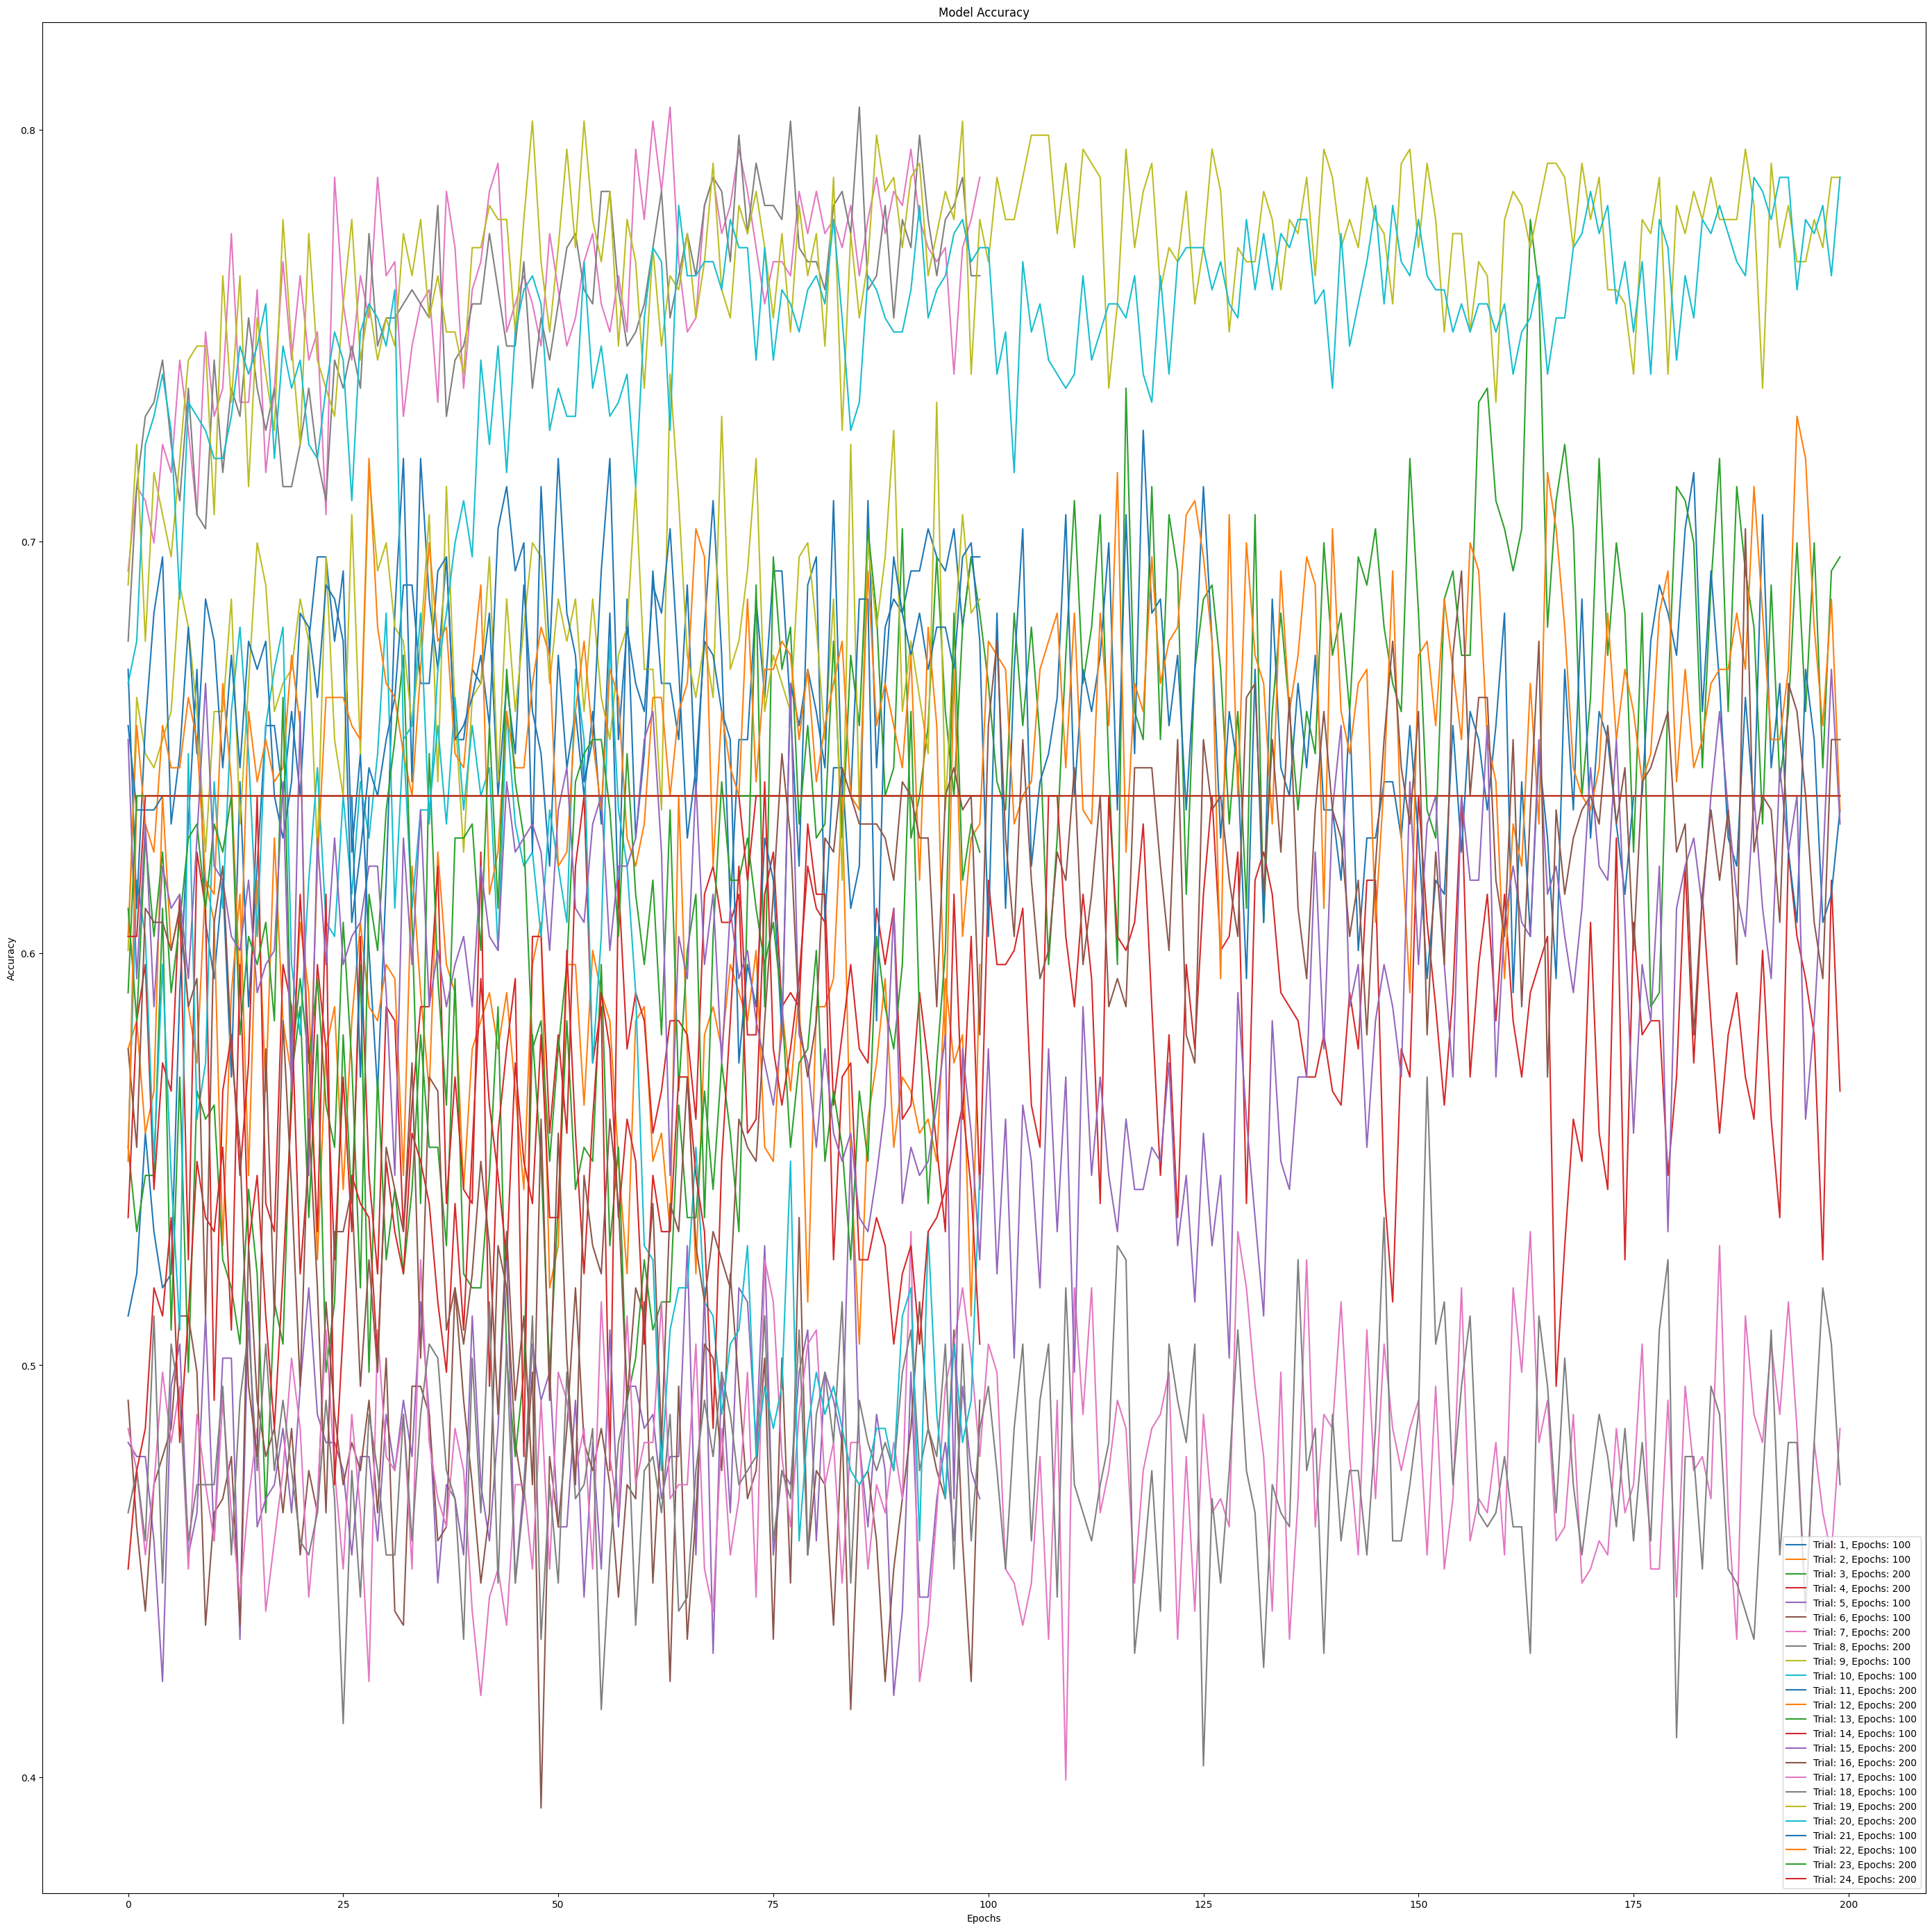

,Trial Number,Learning Rate,Activation Function,Epochs,Number of Layers,Train Accuracy,Train Error,Test Accuracy,Test Error
0,1,0.01,sigmoid,100,2,0.211604,0.788396,0.224490,0.775510
1,2,0.01,sigmoid,100,3,0.211604,0.788396,0.224490,0.775510
2,3,0.01,sigmoid,200,2,0.638225,0.361775,0.591837,0.408163
3,4,0.01,sigmoid,200,3,0.638225,0.361775,0.591837,0.408163
4,5,0.10,sigmoid,100,2,0.211604,0.788396,0.224490,0.775510
5,6,0.10,sigmoid,100,3,0.638225,0.361775,0.591837,0.408163
6,7,0.10,sigmoid,200,2,0.638225,0.361775,0.591837,0.408163
7,8,0.10,sigmoid,200,3,0.638225,0.361775,0.591837,0.408163
8,9,0.01,tanh,100,2,0.576792,0.423208,0.540816,0.459184
9,10,0.01,tanh,100,3,0.638225,0.361775,0.591837,0.408163


In [ ]:

#####################################################################################################################
#   Assignment 2: Neural Network Analysis
#   This is a starter code in Python 3.6 for a neural network.
#   You need to have numpy and pandas installed before running this code.
#   You need to complete all TODO marked sections
#   You are free to modify this code in any way you want, but need to mention it
#       in the README file.
#
#####################################################################################################################


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import recall_score
from matplotlib import pyplot as plt
from itertools import product




class NeuralNet:
    def __init__(self, dataFile, header=True):
        self.raw_input = pd.read_csv(dataFile, delim_whitespace = True)

    # TODO: Write code for pre-processing the dataset, which would include
    # standardization, normalization,
    #   categorical to numerical, etc
    def preprocess(self):
        self.processed_data = self.raw_input
        self.processed_data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
        self.processed_data = self.processed_data.dropna()
        self.processed_data = self.processed_data.drop_duplicates()
        self.processed_data = self.processed_data.drop(self.processed_data[self.processed_data['horsepower'] == '?'].index)

        self.processed_data["cylinders"] = pd.to_numeric(self.processed_data["cylinders"], downcast="integer")
        self.processed_data["displacement"] = pd.to_numeric(self.processed_data["displacement"], downcast="float")
        self.processed_data["horsepower"] = pd.to_numeric(self.processed_data["horsepower"], downcast="float")
        self.processed_data["model_year"] = pd.to_numeric(self.processed_data["model_year"], downcast="integer")
        self.processed_data['weight'] = pd.to_numeric(self.processed_data['weight'], downcast='float')
        self.processed_data['origin'] = pd.to_numeric(self.processed_data['origin'], downcast='integer')

        self.processed_data = self.processed_data.reset_index(drop=True)

        #normalize data
        #Y = np.array((Y - Y.mean())/Y.std())
        #X = X.apply(lambda rec:(rec-rec.mean())/rec.std(), axis=0)

        return 0

    # TODO: Train and evaluate models for all combinations of parameters
    # specified in the init method. We would like to obtain following outputs:
    #   1. Training Accuracy and Error (Loss) for every model
    #   2. Test Accuracy and Error (Loss) for every model
    #   3. History Curve (Plot of Accuracy against training steps) for all
    #       the models in a single plot. The plot should be color coded i.e.
    #       different color for each model


    def train_evaluate(self):

      #X = self.processed_data.drop("mpg", axis = 1)
      X = self.processed_data[['weight', 'horsepower', 'displacement', 'cylinders']]
      X = X.apply(lambda rec:(rec-rec.mean())/rec.std(), axis=0)
      y = self.processed_data['mpg']
      y = np.array((y - y.mean())/y.std())
      y = pd.DataFrame(y, columns=['mpg'])
      y=y['mpg']
      y = to_categorical(y)

      X_train, X_test, y_train, y_test = train_test_split(
          X, y)

      # hyperparameters to use for model evaluation
      activations = ['sigmoid', 'tanh', 'relu']
      learning_rate = [0.01, 0.1]
      max_iterations = [100, 200] # also known as epochs
      num_hidden_layers = [2, 3]

      possible_params = list(product(activations, learning_rate, max_iterations, num_hidden_layers))

      # go through each possible case
      model_histories = []
      trial = 1
      combos = []
      for combo in possible_params:
        act, alpha, epoch, layers = combo

        # add the layers with current activation
        model = Sequential()

        if layers == 2:
          model.add(Dense(800, activation=act))
        elif layers == 3:
          model.add(Dense(800, activation=act))
          model.add(Dense(500, activation=act))

        model.add(Dense(500, activation=act, input_dim=8))
        model.add(Dense(3, activation='softmax'))

        # learning rate
        opt = keras.optimizers.Adam(learning_rate=alpha)

        model.compile(optimizer=opt,
          loss='categorical_crossentropy',
          metrics=['accuracy'])

    # output the accuracy, error, and hyperparameters used for each trial
        print(f'\n____________________________________________TRIAL #{trial} is currently loading...____________________________________________')
        model.fit(X_train, y_train)
        outp = model.evaluate(X_train, y_train, verbose=0)
        train_accuracy = outp[1]
        train_error = 1 - outp[1]

        y_test_pred = model.predict(X_test)
        outp2 = model.evaluate(X_test, y_test, verbose=0)
        test_accuracy = outp2[1]
        test_error = 1 - outp2[1]

        # track model history and combination of hyperparameters used
        history = model.fit(X_train, y_train, epochs=epoch, batch_size=4, verbose=0, validation_data=(X_test,y_test))
        model_histories.append(history)
        combos.append({
            'Trial Number': trial,
            'Learning Rate': alpha,
            'Activation Function': act,
            'Epochs': epoch,
            'Number of Layers': layers,
            'Train Accuracy': train_accuracy,
            'Train Error': train_error,
            'Test Accuracy': test_accuracy,
            'Test Error': test_error
        })

        trial += 1

      # SHOWING THE TABLE
      output = pd.DataFrame(columns = ['Trial Number', 'Learning Rate', 'Activation Function', 'Epochs', 'Number of Layers', 'Train Accuracy', 'Train Error', 'Test Accuracy', 'Test Error'])

      # PLOTTING THE HISTORY

      plt.figure(figsize=(35,35))
      i = 0

      for combo in combos:
        output = output.append(combo, ignore_index = True)
        trial_num = combo['Trial Number']
        epoch = combo['Epochs']
        plt.plot(model_histories[i].history['accuracy'], label = f'Trial: {trial_num}, Epochs: {epoch}')
        i = i + 1

      plt.title('Model Accuracy')
      plt.ylabel('Accuracy')
      plt.xlabel('Epochs')
      plt.legend()
      plt.show()
      display(output)

      return 0


if __name__ == "__main__":
    neural_network = NeuralNet("https://raw.githubusercontent.com/Jerpac/CS4375/main/auto-mpg.data") # put in path to your file
    neural_network.preprocess()
    neural_network.train_evaluate()
